# Week 9: Instructor Led Lab
Author: Jen Estes \
Course: BGEN 632 - Introduction to Python \
Term: Spring 2025 \
Due Date: April 28st, 2025 

This notebook contains code for implementing statistical approaches in Python based on the requirements outlined by Dr. Newton in the BGEN632 Week 9 GitHub repo. While using data on 61 hospitals and employee personnel in California, this program preps the data and then completes descriptive statistics to help explore and understand the data. 

### Notebook Setup
----

In [4]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [5]:
# set working directory
os.chdir("/Users/jenestes/Desktop/week9labs/data")   
os.getcwd()  # confirm change

'/Users/jenestes/Desktop/week9labs/data'

## Merging the Data 
This section of my program loads both the Hospital and Personnel Data and inspects the tables, and then merges the two data frames on the `HospitalID` variable. Then, the specified columns are deleted and data types are converted to create the final DataFrame `new_merge`. 

In [7]:
# load data - both files and inspect them
# hospital data
hospital_data = pd.read_csv("CaliforniaHospitalData.csv")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB


In [8]:
# personnel data
personnel_data = pd.read_csv("CaliforniaHospitalData_Personnel.txt", delimiter = "\t")
personnel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HospitalID     64 non-null     int64 
 1   Work_ID        64 non-null     int64 
 2   LastName       64 non-null     object
 3   FirstName      64 non-null     object
 4   Gender         64 non-null     object
 5   PositionID     64 non-null     int64 
 6   PositionTitle  64 non-null     object
 7   Compensation   64 non-null     int64 
 8   MaxTerm        64 non-null     int64 
 9   StartDate      64 non-null     object
 10  Phone          64 non-null     object
 11  Email          64 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB


In [9]:
# merging the data on HospitalID
merged_hospital = hospital_data.merge(personnel_data, how = 'inner', on = "HospitalID")
merged_hospital

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011,801-223-6845,emily.manin@ihc.com
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com


## Prep Data and Add A New Record

In [11]:
# removing columns- Work_ID, PositionID, Website
final_hospital = merged_hospital.drop(['Work_ID', 'PositionID', 'Website'], axis = 1)
final_hospital

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,107,Adamson,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,42,Iwata,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,...,530,Manin,Emily,F,Regional Representative,46978,4,1/1/2011,801-223-6845,emily.manin@ihc.com
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com


In [12]:
# getting column names to make sure record inserted correctly
final_hospital.columns

Index(['HospitalID', 'Name', 'Zip', 'TypeControl', 'Teaching', 'DonorType',
       'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc',
       'AvlBeds', 'LastName', 'FirstName', 'Gender', 'PositionTitle',
       'Compensation', 'MaxTerm', 'StartDate', 'Phone', 'Email'],
      dtype='object')

In [16]:
# inserting myself into new row
new_row = pd.DataFrame({'HospitalID': [38798],
                         'Name': ["Goleta Valley Cottage Hospital"],
                         'Zip':[93111],
                         'TypeControl': ["Non Profit"],
                         'Teaching': ["Small/Rural"],
                         'DonorType': ["Charity"],
                         'NoFTE': [288.0],
                         'NetPatRev': [335179.5574],
                         'InOperExp': [53589036.09],
                         'OutOperExp': [67030147.91],
                         'OperRev': [126303054],
                         'OperInc': [5683870],
                         'AvlBeds': [119],
                         'LastName': ["Estes"], 
                         'FirstName': ["Jen"],
                         'Gender': ["F"],
                        'PositionTitle': ["Regional Representative"],
                        'Compensation': [46978],
                        'MaxTerm': [4],
                        'StartDate': ["4/23/2025"],
                        'Phone': ["425-505-1130"],
                        'Email': ["bigred0606@gmail.com"]},
                        index = [28]
                       )

In [22]:
# using concat to add the new rows to the dataframe, and saving it as new_merge
new_merge = pd.concat([final_hospital, new_row], ignore_index = True)
new_merge

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,107,Adamson,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,42,Iwata,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com


In [24]:
# test to see if new row was added
print(len(final_hospital.index.values))  # original DataFrame

print(len(new_merge.index.values))  # new DataFrame

61
62


In [26]:
new_merge.dtypes

HospitalID         int64
Name              object
Zip               object
TypeControl       object
Teaching          object
DonorType         object
NoFTE            float64
NetPatRev        float64
InOperExp        float64
OutOperExp       float64
OperRev            int64
OperInc            int64
AvlBeds            int64
LastName          object
FirstName         object
Gender            object
PositionTitle     object
Compensation       int64
MaxTerm            int64
StartDate         object
Phone             object
Email             object
dtype: object

In [28]:
# converting StartDate to datetime
new_merge['StartDate'] = pd.to_datetime(new_merge['StartDate'])

In [30]:
# converting object data to categorical data type
new_merge['TypeControl'] = new_merge['TypeControl'].astype('category')
new_merge['Teaching'] = new_merge['Teaching'].astype('category')
new_merge['DonorType'] = new_merge['DonorType'].astype('category')
new_merge['Gender'] = new_merge['Gender'].astype('category')

In [32]:
# confirming these changes
new_merge.dtypes

HospitalID                int64
Name                     object
Zip                      object
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
LastName                 object
FirstName                object
Gender                 category
PositionTitle            object
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                    object
Email                    object
dtype: object

## Descriptive Statistics
### Summary Statistics 
This section of the program calculates summary statistics for variables in the dataset by datatype. Summary statistics are calculated separately for numerical data, text data, and categorical data. 

In [35]:
# summary statistics - numerical 
new_merge.describe(include=['number'])

,HospitalID,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm
count,62.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000
mean,31940.870968,1333.130968,6.641900e+05,1.644531e+08,8.978505e+07,2.541770e+08,-6.116811e+04,193.306452,92036.064516,4.241935
std,10959.110246,2013.141492,1.089308e+06,2.808249e+08,1.361914e+08,4.218103e+08,7.095959e+07,220.216108,84049.644628,2.093593
min,10767.000000,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000,23987.000000,2.000000
25%,21335.000000,216.375000,7.284830e+04,1.382645e+07,1.429398e+07,2.685966e+07,-1.028922e+06,42.750000,46978.000000,3.000000
50%,33267.000000,368.660000,1.728132e+05,3.227595e+07,3.582774e+07,6.393148e+07,1.615009e+06,100.500000,46978.000000,4.000000
75%,39095.500000,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000,89473.000000,4.000000
max,46996.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,248904.000000,8.000000


In [37]:
# summary statistics - text 
new_merge.describe(include=['object'])

,Name,Zip,LastName,FirstName,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62
unique,61,62,24,20,4,25,25
top,Goleta Valley Cottage Hospital,93546-0660,Smith,David,Regional Representative,785-532-2452,david.web@comenitymed.com
freq,2,1,4,6,25,3,3


In [39]:
# summary statistics - categorical 
new_merge.describe(include=['category'])

,TypeControl,Teaching,DonorType,Gender
count,62,62,62,62
unique,4,2,2,2
top,Non Profit,Small/Rural,Charity,F
freq,38,45,45,33


### Creating Visuals : Histograms

This section creates histograms for the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

<Axes: ylabel='Frequency'>

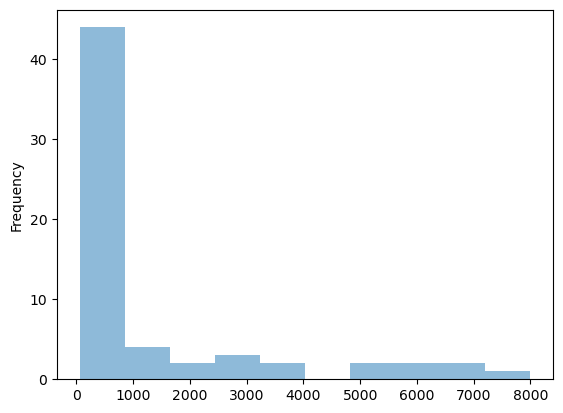

In [42]:
# histogram for `NoFTE`
new_merge['NoFTE'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

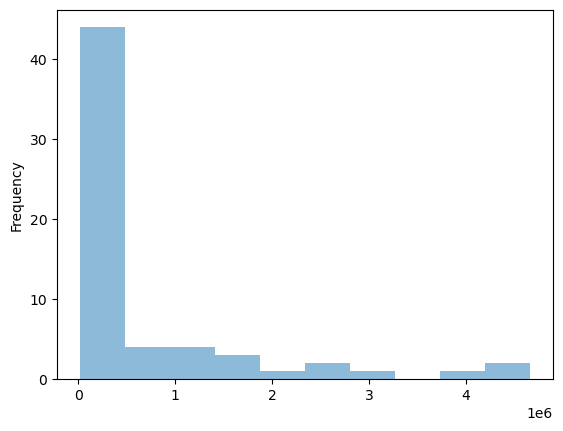

In [44]:
# histogram for `NetPatRev`
new_merge['NetPatRev'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

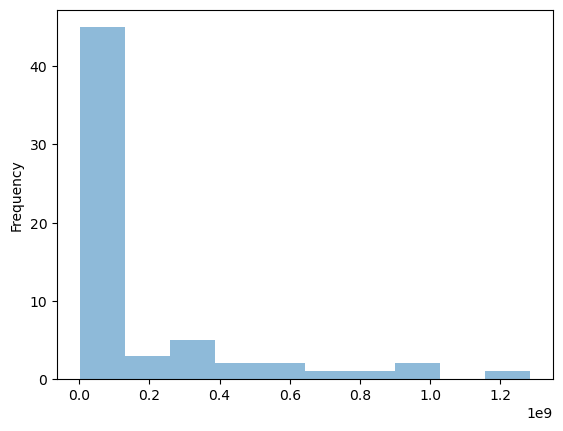

In [46]:
# histogram for `InOperExp`
new_merge['InOperExp'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

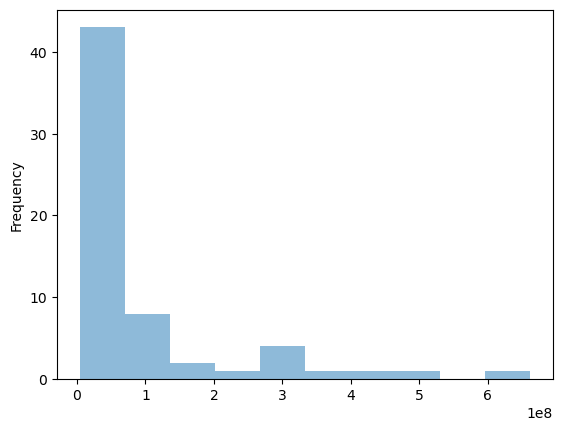

In [48]:
# histogram for `OutOperExp`
new_merge['OutOperExp'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

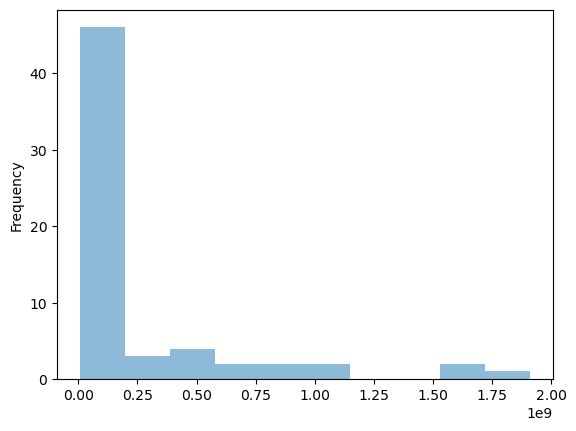

In [50]:
# histogram for `OperRev`
new_merge['OperRev'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

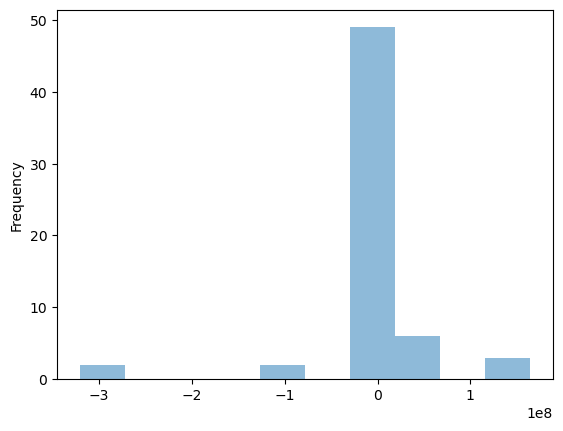

In [52]:
# histogram for `OperInc`
new_merge['OperInc'].plot.hist(alpha=0.5) 

<Axes: ylabel='Frequency'>

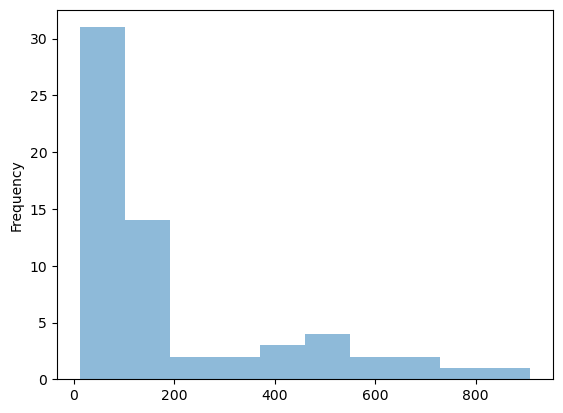

In [54]:
# histogram for `AvlBeds`
new_merge['AvlBeds'].plot.hist(alpha=0.5) 

### Creating Visuals : Scatterplots

This section of the program creates scatterplots of the following variables using *net patient revenue* as the target variable (i.e., place it on the *y*-axis): `NoFTE`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`. To improve analysis of the scatterplots, correlation between the two variables is calculated as well. 

<Axes: xlabel='NoFTE', ylabel='NetPatRev'>

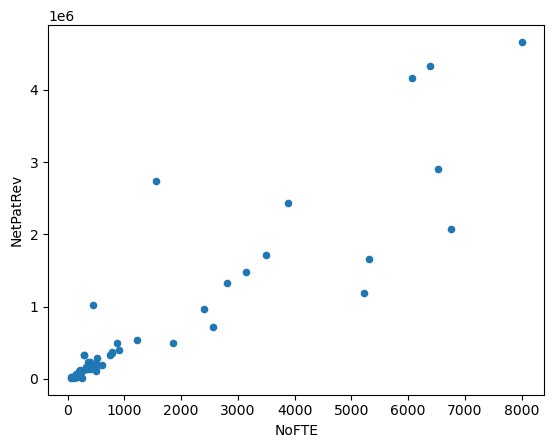

In [57]:
# scatter plot of `NetPatRev` and `NoFTE`
new_merge.plot.scatter(x='NoFTE', y='NetPatRev')

The plot above exhibits a fairly strong, positive linear relationship between net patient revenue and number of full time employees at the hospital, and we can check this relationship using the corr() function below. This helps us measure the relationship between the two variables and supports the analysis of the scatterplot. 

In [60]:
# correlation measure
new_merge['NetPatRev'].corr(new_merge['NoFTE'])

0.9037225061943901

<Axes: xlabel='InOperExp', ylabel='NetPatRev'>

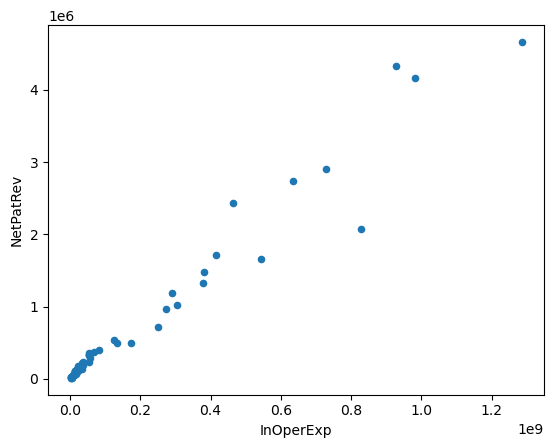

In [62]:
# scatter plot of `NetPatRev` and `InOperExp`
new_merge.plot.scatter(x='InOperExp', y='NetPatRev')

The plot above exhibits a very strong, positive linear relationship between net patient revenue and inpatient operating costs, and we can check this relationship using the corr() function below. 

In [65]:
# correlation measure
new_merge['NetPatRev'].corr(new_merge['InOperExp'])

0.97908014133143

<Axes: xlabel='OutOperExp', ylabel='NetPatRev'>

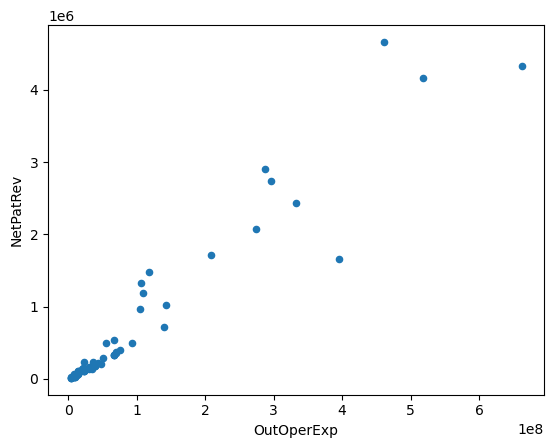

In [67]:
# scatter plot of `NetPatRev` and `OutOperExp`
new_merge.plot.scatter(x='OutOperExp', y='NetPatRev')

The plot above exhibits a strong, positive linear relationship between net patient revenue and outpatient operating costs, and we can check this relationship using the corr() function below. 

In [70]:
# correlation measure
new_merge['NetPatRev'].corr(new_merge['OutOperExp'])

0.9601195873955883

<Axes: xlabel='OperRev', ylabel='NetPatRev'>

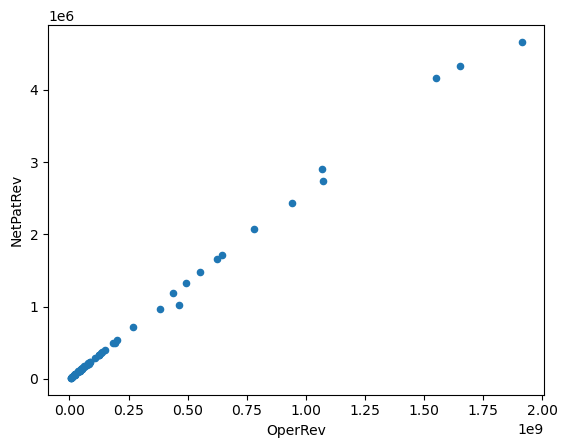

In [72]:
# scatter plot of `NetPatRev` and `OperRev`
new_merge.plot.scatter(x='OperRev', y='NetPatRev')

The plot above exhibits a very strong, almost perfect positive linear relationship between net patient revenue and operating revenue, and we can check this relationship using the corr() function below. This correlation the strongest value so far. 

In [75]:
# correlation measure
new_merge['NetPatRev'].corr(new_merge['OperRev'])

0.9987669210202378

<Axes: xlabel='OperInc', ylabel='NetPatRev'>

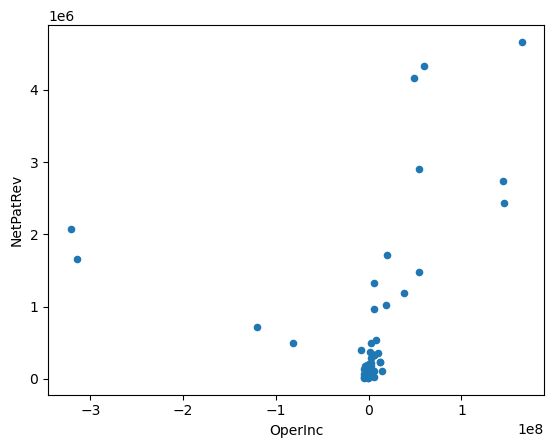

In [77]:
# scatter plot of `NetPatRev` and `OperInc`
new_merge.plot.scatter(x='OperInc', y='NetPatRev')

The plot above exhibits a very weak, slightly positive linear relationship between net patient revenue and operating income, and we can check this relationship using the corr() function below. This is the weakest relationship between net patient revenue and other variables thus far. 

In [80]:
# correlation measure
new_merge['NetPatRev'].corr(new_merge['OperInc'])

0.21956214333029503

### Creating Visuals : Boxplots

This section of the program creates boxplots and assesses the lack or presence of outliers for the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

<Axes: >

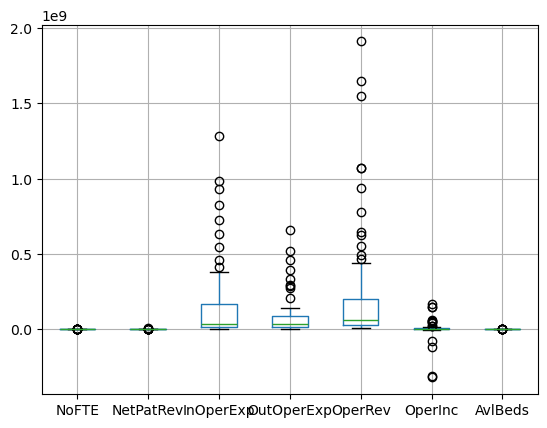

In [83]:
# initial boxplot with all variables
new_merge.loc[:,['NoFTE','NetPatRev','InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']].boxplot()

With the initial diagram above, it appears that the variables'InOperExp', 'OutOperExp', 'OperRev', and 'OperInc' may have outliers. With the other variables 'NoFTE','NetPatRev', and 'AvlBeds', it is too difficult to determine in this plot. In order to confirm each variable, I will make more boxplots to bring specific plots into focus. 

<Axes: >

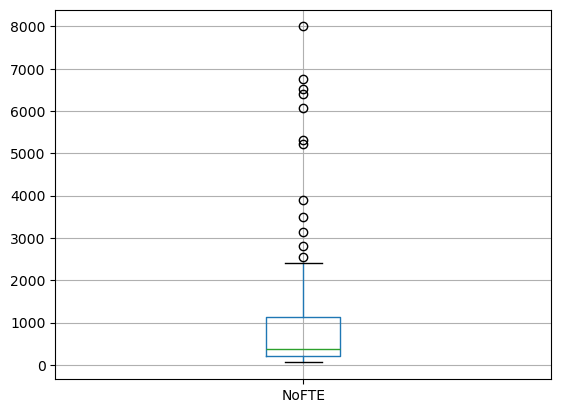

In [86]:
# NoFTE boxplot
new_merge.loc[:,['NoFTE']].boxplot()

<Axes: >

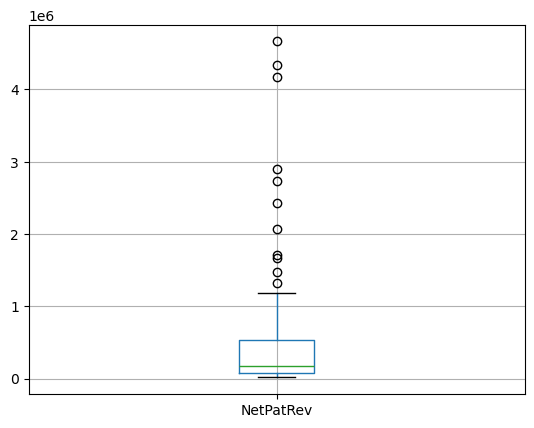

In [88]:
# NetPatRev boxplot
new_merge.loc[:,['NetPatRev']].boxplot()

<Axes: >

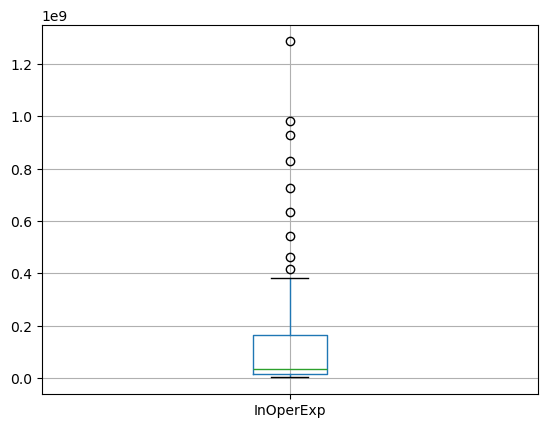

In [90]:
# InOperExp boxplot
new_merge.loc[:,['InOperExp']].boxplot()

<Axes: >

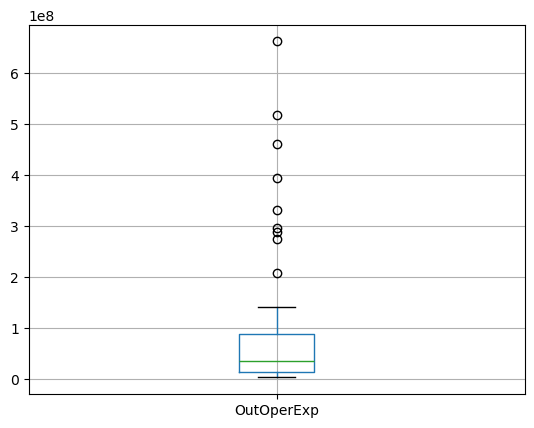

In [92]:
# OutOperExp boxplot
new_merge.loc[:,['OutOperExp']].boxplot()

<Axes: >

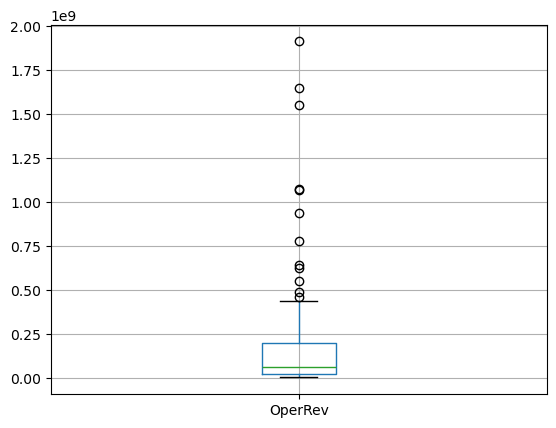

In [94]:
# OperRev boxplot
new_merge.loc[:,['OperRev']].boxplot()

<Axes: >

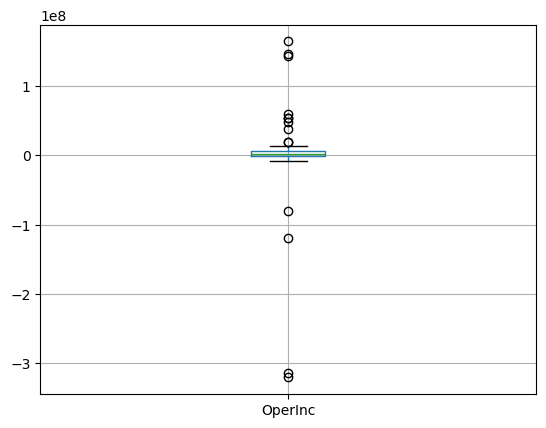

In [96]:
# OperInc boxplot
new_merge.loc[:,['OperInc']].boxplot()

<Axes: >

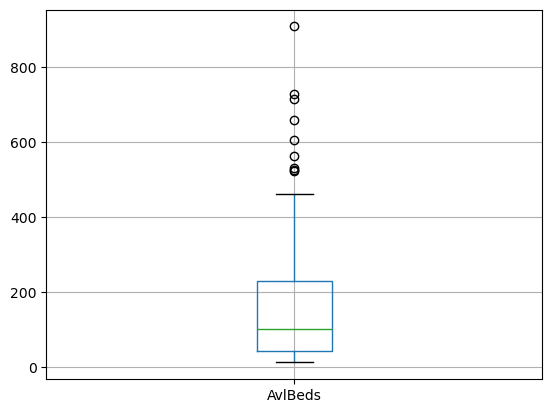

In [98]:
# AvlBeds boxplot
new_merge.loc[:,['AvlBeds']].boxplot()

### Analysis: Boxplots
The plots above show that there are outliers present for all of the used variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`. For most of these variables the outliers are present on the upper bound (above the top horizontal line), but for the variable `OperInc` there are outliers on both sides. 

### QQ Plots and Shapiro-Wilk test
This section of the program creates a QQ plot using 3 variables and provides an assessment of the normality, and also performs  a Shapiro-Wilk test on those three variables to compare results. 

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  55.  ,   67.  ,   75.  ,  100.  ,  121.  ,  150.  ,  158.  ,
   

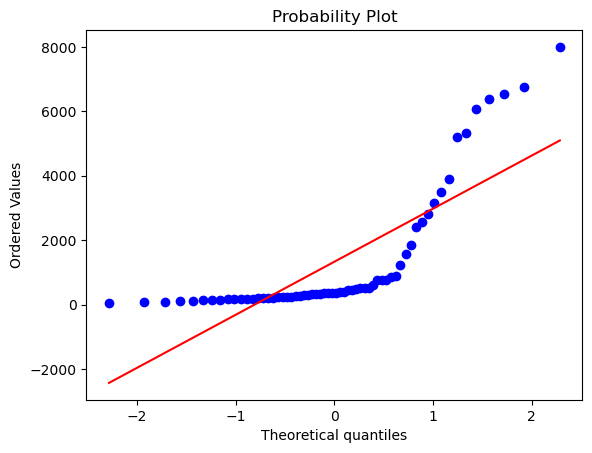

In [102]:
# QQ plot for `NoFTE`
sts.probplot(new_merge.NoFTE, dist="norm", plot=plt)

In [104]:
# shapiro-wilk test for `NoFTE`
sts.shapiro(new_merge.NoFTE)

ShapiroResult(statistic=0.6401627972789985, pvalue=4.641965644399091e-11)

The QQ plot assesses the normality of the variable of the number of full time employees at the hospitals, and we can see that the blue data points do not line up with the red line representing the normal distribution. The results from the Shapiro- Wilk test confirm this, as the pvalue is significant, meaning this variable does not follow a normal distribution. 

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([-321163336, -314000601, -119949304,  -81022041,   -7850861,
      

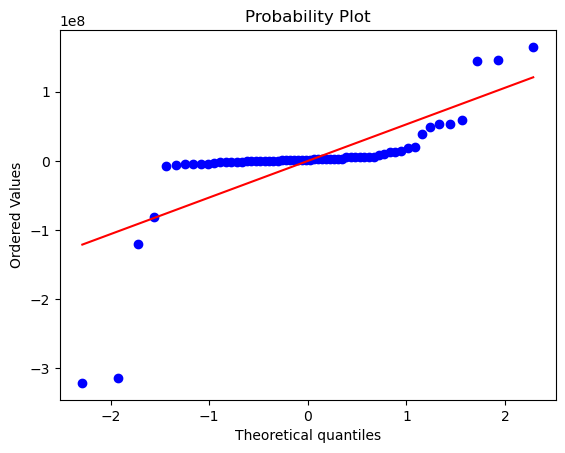

In [107]:
# QQ plot for `OperInc`
sts.probplot(new_merge.OperInc, dist="norm", plot=plt)

In [109]:
# shapiro-wilk test for `OperInc`
sts.shapiro(new_merge.OperInc)

ShapiroResult(statistic=0.5557218596676744, pvalue=2.0541413701631304e-12)

The QQ plot assesses the normality of the variable of operating income, and we can see that the blue data points do not line up with the red line representing the normal distribution. This is espeically clear by the horizontal line of data points and spread out tails in the data. The results from the Shapiro- Wilk test confirm this, as the pvalue is significant, meaning this variable does not follow a normal distribution. 

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  14172.24044,   14313.04918,   17566.92896,   26260.51366,
      

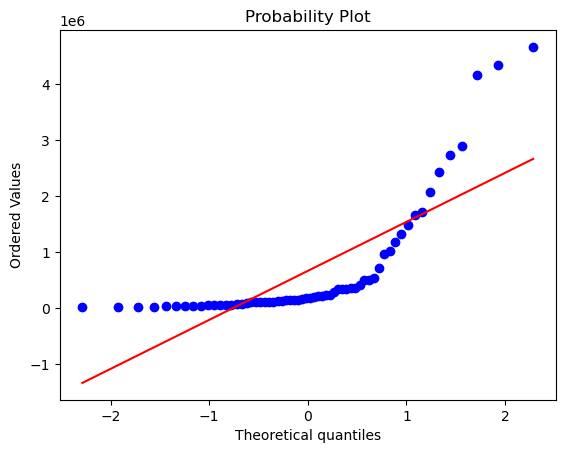

In [112]:
# QQ plot for `NetPatRev`
sts.probplot(new_merge.NetPatRev, dist="norm", plot=plt)

In [114]:
# shapiro-wilk test for `OperInc`
sts.shapiro(new_merge.NetPatRev)

ShapiroResult(statistic=0.620914536893302, pvalue=2.1886690127482857e-11)

The QQ plot assesses the normality of the variable of the net patient revenue, and we can see that the blue data points do not line up with the red line representing the normal distribution. The results from the Shapiro- Wilk test confirm this, as the pvalue is significant, meaning this variable does not follow a normal distribution. 

#### Lab Complete!